In [1]:
from typing import Callable, List
from tqdm.auto import tqdm
import pandas as pd

from bench_func import run_benchmark

import pennylane as qml
from pennylane import numpy as np
import torch
import time

In [2]:
def create_circuit(n_qubits):
    '''Example function for creating test circuit'''

    dev = qml.device("lightning.qubit", wires=n_qubits)
    
    @qml.qnode(dev, interface="torch", diff_method="adjoint")
    def circuit(params):
        # wall of single qubit operations
        for i in range(n_qubits):
            qml.RY(params[0, i]*np.pi, wires=i)
            
        # ladder of entangling operations
        for i in range(n_qubits):
            qml.IsingXX(params[1, i]*np.pi, wires=[i, (i+1)%n_qubits])

        return qml.expval(qml.PauliZ(0))
    
    return circuit

steps = 200

def test_time(n_qubits):
    circuit = create_circuit(n_qubits)
    params = torch.rand((2, n_qubits), requires_grad=True)
    def cost(params):
        return (1 - circuit(params))**2
    
    opt = torch.optim.Adam([params], lr = 0.1)
    beg_steps = 5
    for i in range(steps+beg_steps):
        if (i == beg_steps):
            beg = time.time()
        opt.zero_grad()
        loss = cost(params)
        loss.backward()
        opt.step()
    end = time.time()
    return (end-beg)*1000

/tmp/ipykernel_476524/3699645154.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


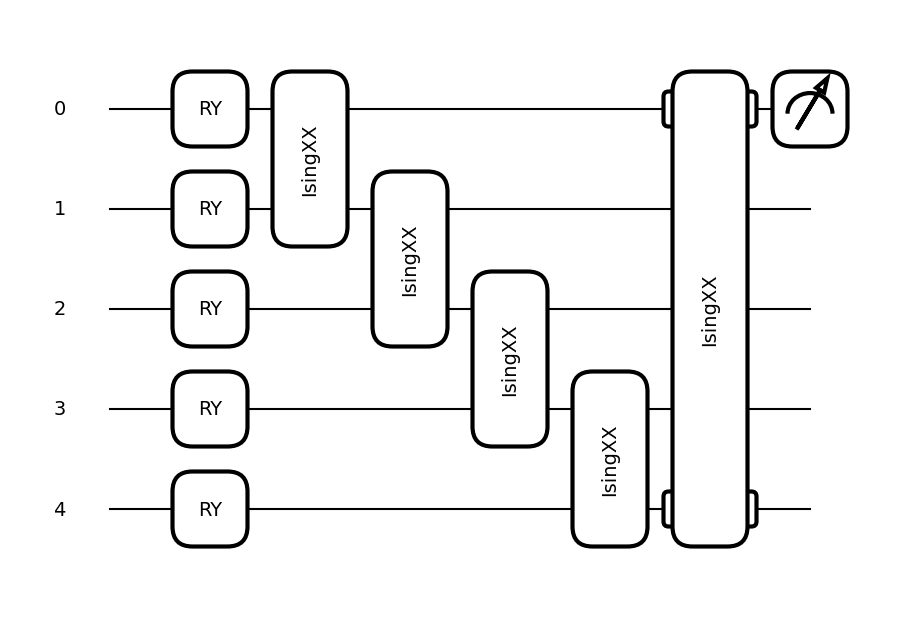

In [3]:
# circuit visualization
n_qubits = 5
circuit = create_circuit(n_qubits)
params = torch.rand((2, n_qubits), requires_grad=True)
fig, ax = qml.draw_mpl(circuit)(params)
fig.show()

In [4]:
file_name="pennylane_best.csv"

def create_circuit(n_qubits):
    dev = qml.device("lightning.qubit", wires=n_qubits)
    
    @qml.qnode(dev, interface="torch", diff_method="adjoint")
    def circuit(params):
        # wall of single qubit operations
        for i in range(n_qubits):
            qml.RY(params[0, i]*np.pi, wires=i)
            
        # ladder of entangling operations
        for i in range(n_qubits):
            qml.IsingXX(params[1, i]*np.pi, wires=[i, (i+1)%n_qubits])

        return qml.expval(qml.PauliZ(0))
    
    return circuit


run_benchmark(range(2, 22), test_time, file_name)

  0%|          | 0/20 [00:00<?, ?it/s]

[2, 587.4271392822266]
[3, 641.1929130554199]
[4, 541.175127029419]
[5, 580.1444053649902]
[6, 715.705156326294]
[7, 755.2697658538818]
[8, 725.5361080169678]
[9, 795.813798904419]
[10, 867.6464557647705]
[11, 1055.2144050598145]
[12, 1323.6024379730225]
[13, 1826.4291286468506]
[14, 1683.053731918335]
[15, 2292.7603721618652]
[16, 3693.636655807495]
[17, 9262.73226737976]
[18, 17789.661645889282]


KeyboardInterrupt: 

In [ ]:
file_name="pennylane_default.csv"

def create_circuit(n_qubits):
    '''Example function for creating test circuit'''

    dev = qml.device("default.qubit", wires=n_qubits)
    
    @qml.qnode(dev, interface="torch", diff_method="adjoint")
    def circuit(params):
        # wall of single qubit operations
        for i in range(n_qubits):
            qml.RY(params[0, i]*np.pi, wires=i)
            
        # ladder of entangling operations
        for i in range(n_qubits):
            qml.IsingXX(params[1, i]*np.pi, wires=[i, (i+1)%n_qubits])

        return qml.expval(qml.PauliZ(0))
    
    return circuit


run_benchmark(range(2, 22), test_time, file_name)